<a href="https://colab.research.google.com/github/AndresJejen/PythonMathemathics/blob/master/Sin_z_Polar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotter Mapping complex Circles regions to sin(z)

This Code implements a plotter class that shows the mapping from complex circles to sin(z), this code helps to understand how mapping works and let the user set the hyperparameters as:   
- **r_start** minimun radio 
- **r_steps** difference between radios
- **n_radios** How many radios you want
- **graph** Setting parameter that set if you wanna plot the left side (negative to zero angle) or right side (zero to positive angle).
- **legend** Let print the legend of the plot
- **theta_start** Angle start (must be negative)
- **theta_end** Angle end (must be positive)


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class plot_sin_z():
  def __init__(self,r_start=1, n_radios = 2, graph=(1,1), legend=False, theta_start = -np.pi/2, theta_end= np.pi/2):
    self.r_start = r_start
    self.n_radios  = n_radios
    self.graph = graph
    self.legend = legend
    self.theta_start = theta_start
    self.theta_end = theta_end
    self.valid = True
    self.__validate_params()

  def __validate_params(self):
    self.valid = self.r_start > 0 and self.n_radios  > 0
    self.valid = self.valid and np.sum(self.graph) > 0 and np.sum(self.graph) < 3 and self.theta_start <= 0 and self.theta_end >= 0
    if(self.valid == False):
      self.__print_params_error();

  def __print_params_error(self):
    print("ERROR - Verifica los parametros")

  def plot(self):
    if (self.valid):
      r = np.linspace(self.r_start,self.n_radios*self.r_start, self.n_radios)
      rangos = self.__set_ranges()
      plt.figure()
      f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
      for i in r:
        for index, rango in enumerate(rangos):

          x_o = i*np.cos(rango['rango'])
          y_o = i*np.sin(rango['rango'])
          ax1.plot(x_o,y_o, label = rango['l'].format(i))

          x = np.sin(i*np.cos(rango['rango']))*np.cosh(i*np.sin(rango['rango']))
          y = np.cos(i*np.cos(rango['rango']))*np.sinh(i*np.sin(rango['rango']))
          ax2.plot(x,y,label=rango['l'].format(i))
      ax2.grid(True)
      ax1.axis('equal')
      ax2.axis('equal')
      ax1.grid(True)
      ax1.set_title(r'$z_0$ de origen')
      ax2.set_title(r'mapeo de $sen(x_0)$')
      if (self.legend == True):
        ax1.legend()
        ax2.legend()
    else:
      self.__print_params_error()
  def __set_ranges(self):
    rangos = []
    if (self.graph[0] == 1):
      rangos.append({'l': r'r = {0},  $-\frac{{\pi}}{{2}} \rightarrow 0$', 'rango': np.linspace(self.theta_start,0,500)})
    if (self.graph[1] == 1):
      rangos.append({'l': r'r = {0},  $0 \rightarrow  \frac{{\pi}}{{2}}$', 'rango': np.linspace(0, self.theta_end,500)})
    return rangos
  

<Figure size 432x288 with 0 Axes>

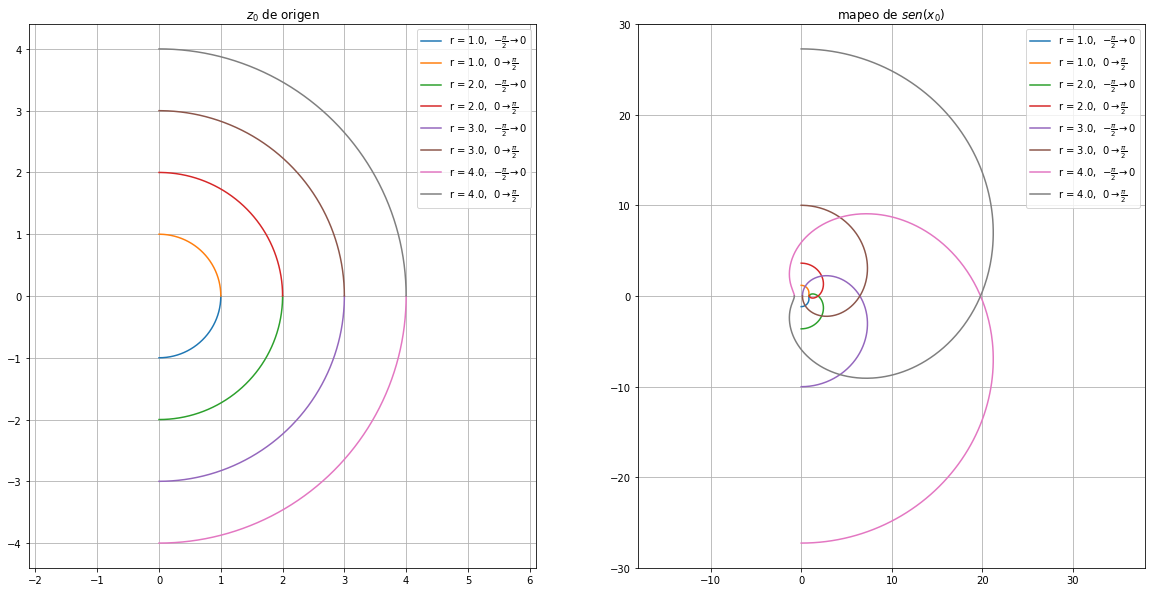

In [0]:
graph = plot_sin_z(legend=True, n_radios = 4, graph=(1,1))
graph.plot()